In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as cores

from matplotlib.pylab import rcParams
import seaborn as sns

# from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.seasonal import seasonal_decompose

/home/ryuga/anaconda3/envs/PDS/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_path = '/home/ryuga/Dropbox/database/dbv3/'
data_parser = lambda dates: pd.to_datetime(dates, unit='h', box=False)
sim_df = pd.read_csv(data_path + 'data/simout_14.csv', index_col=0, parse_dates=['tout'], date_parser=data_parser)
# sim_df.head()

In [6]:
'# rcParams['figure.figsize'] = 15, 6

rcParams['figure.figsize'] '

[15.0, 6.0]

In [ ]:
from pandas.tseries.offsets import *
# sim_df.index.freq = None
# print(pd.infer_freq(sim_df.index))
# sim_df.asfreq
# pd.DateOffset(seconds=36)
sim_df.index

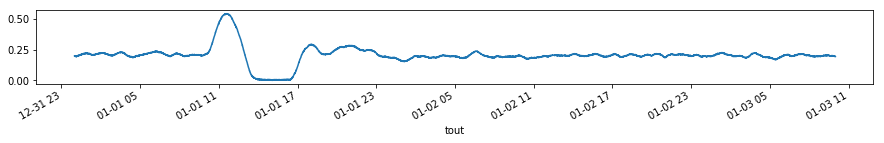

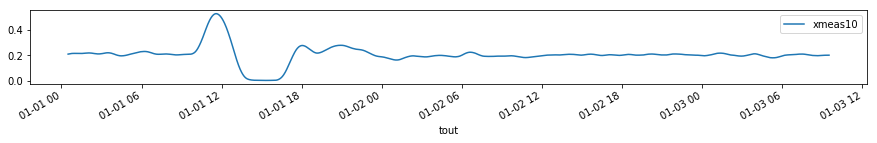

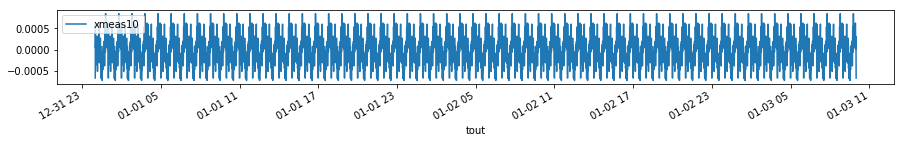

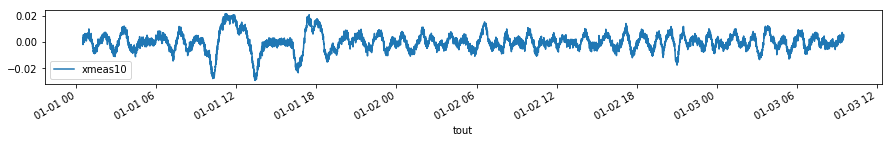

In [44]:
decomposition = seasonal_decompose(sim_df[['xmeas10']], freq=100)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plot_size = (15, 1.5)

sim_df['xmeas10'].plot(figsize=plot_size)
plt.show()
trend.plot(figsize=plot_size)
plt.show()
seasonal.plot(figsize=plot_size)
plt.show()
residual.plot(figsize=plot_size)
plt.show()


In [46]:
residual[100:-100]

,xmeas10
tout,
1970-01-01 01:00:00.000000000,0.001867
1970-01-01 01:00:36.000000000,0.005502
1970-01-01 01:01:12.000000000,0.004248
1970-01-01 01:01:48.000000000,0.005089
1970-01-01 01:02:24.000000000,0.000929
1970-01-01 01:03:00.000000000,0.004726
1970-01-01 01:03:36.000000000,0.002628
1970-01-01 01:04:12.000000000,0.002404
1970-01-01 01:04:48.000000000,0.000947


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

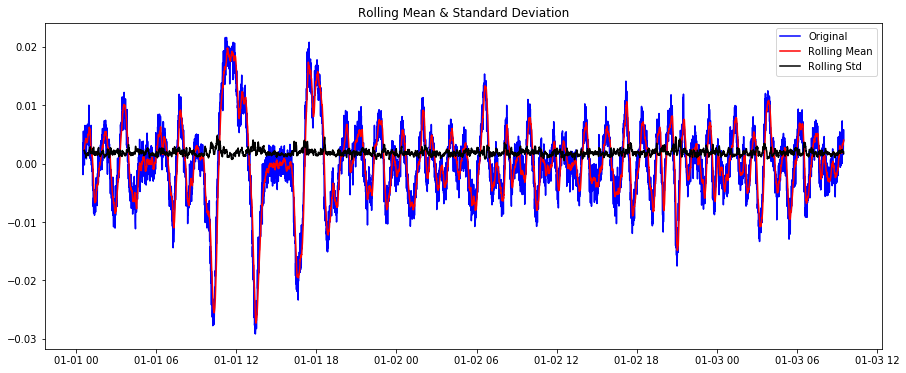

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [47]:
test_stationarity(residual.dropna())

In [ ]:
from statsmodels.tsa.tsatools import freq_to_period

decomposition = seasonal_decompose(sim_df[['xmeas10']], freq=100)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sim_df[['xmeas10']].values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
sim_df.iloc[1000:].plot(subplots=True, figsize=(16, 48))
plt.show()

In [ ]:
model = VAR(sim_df)

In [ ]:
model.select_order(200)

In [ ]:
m_res = model.fit(maxlags=200, ic='aic')

In [ ]:
m_res.test_causality()

In [ ]:
c = gc_test(sim_df[['xmeas1', 'xmeas4']], maxlag=200, verbose=False)

In [ ]:
k = 3
print(c[1][0])
for i in c:
    if c[i][0]['params_ftest'][1] < .05:
        print(i)
        print(c[i][0]['params_ftest'])
        if c[i][0]['params_ftest'][0] > 

In [ ]:
# x = np.array([[i, c[i][0]['params_ftest'][0]] for i in c if c[i][0]['params_ftest'][1] < .01])
x = np.array([[i, c[i][0]['params_ftest'][1]] for i in c])
x
# markerline, stemlines, baseline = plt.stem(x[:, 0],x[:, 1], '--k', markerfmt='b.')
# plt.setp(baseline, 'color', 'black', 'linewidth', 2)
# plt.setp(stemlines, 'color', cores.to_rgba('black', .5))
# plt.setp(markerline, 'color', cores.to_rgba(plt.getp(markerline, 'color'), .5))
# plt.show()
# plt.plot(x[:,1])
# plt.show()

In [ ]:
x = [c[i][0]['params_ftest'][1] for i in c]

plt.plot(np.arange(1, 201), x)
plt.show()
print(np.argmax(x))

In [ ]:
x = [c[i][0]['params_ftest'][0] for i in c]

plt.plot(np.arange(1, 201), x)
plt.show()
print(np.argmax(x))

In [ ]:
x = [- np.log(c[i][0]['params_ftest'][1]) for i in c]

markerline, stemlines, baseline = plt.stem(np.arange(1, 201), x , '--k', markerfmt='b.')
plt.setp(baseline, 'color', 'black', 'linewidth', 2)
plt.setp(stemlines, 'color', cores.to_rgba('black', .5))
plt.setp(markerline, 'color', cores.to_rgba(plt.getp(markerline, 'color'), .5))
plt.show()

In [ ]:
np.array((41, 41), dtype='object')

In [ ]:
test_statistic = pd.Series(data=[cv[0]['params_ftest'][0] for cv in c.values()], index=c.keys())
lags = [c[k][0]['params_ftest'][1] < .01 for k in c.keys()]
mi = test_statistic[lags].mean()
sigma = test_statistic[lags].std()r

test_statistic[lags & (test_statistic > mi + 1*sigma)]


In [ ]:
gc_mat = np.zeros((41, 41), dtype='object')
k = 1
for i in range(4):
    for j in range(4):
        gc_res = gc_test(sim_df[['xmeas' + str(j + 1), 'xmeas' + str(i + 1)]], maxlag=200, verbose=False)
        
        test_statistic = pd.Series(data=[gc[0]['params_ftest'][0] for gc in gc_res.values()], index=gc_res.keys())
        lags = [gc[0]['params_ftest'][1] < .01 for gc in gc_res.values()]
        mi = test_statistic[lags].mean()
        sigma = test_statistic[lags].std()
        gc_mat[i, j] = test_statistic[lags & (test_statistic > mi + k*sigma)]

In [ ]:
gc_mat[0:4,0:4]

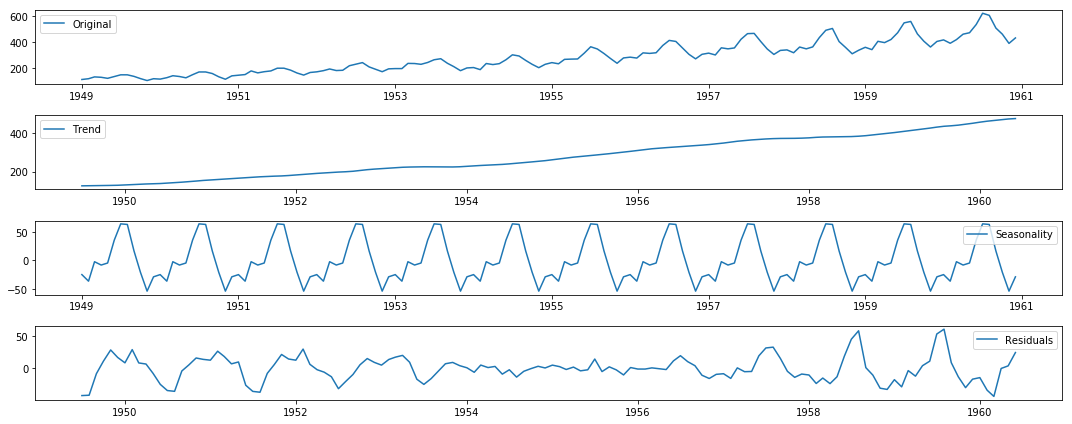

In [42]:
serie = pd.read_csv('/home/ryuga/Downloads/passengers.csv', header=0, index_col=0, parse_dates=True, sep=';')
serie.index
decomposition = seasonal_decompose(serie)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [43]:
residual

,n_passengers
tout,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,-42.622475
1949-08-01,-42.073232
1949-09-01,-8.478535
